In [46]:
import torch

import random
import numpy as np
from numpy.linalg import *
import matplotlib.pyplot as plt
import cmath
from scipy import integrate
# Enable interactive plot
%matplotlib notebook
#import matplotlib.animation as anim
import os

import h5py

#plt.style.use('seaborn')
color = ['#83b692','#f9ada0', '#f9627d', '#c65b7c', '#5b3758']

## Plot Input & Output

In [54]:
# To load the file

directory = './DataNew/'

h5f = h5py.File(directory+'nothing3.h5', 'r')  # name of file
X_vis = h5f.get('dataset_X')
y_vis = h5f.get('dataset_y')

In [72]:
n_grid = 100
a = -1.5
b = 1.5
dat = 3 # Choosing a data

<IPython.core.display.Javascript object>


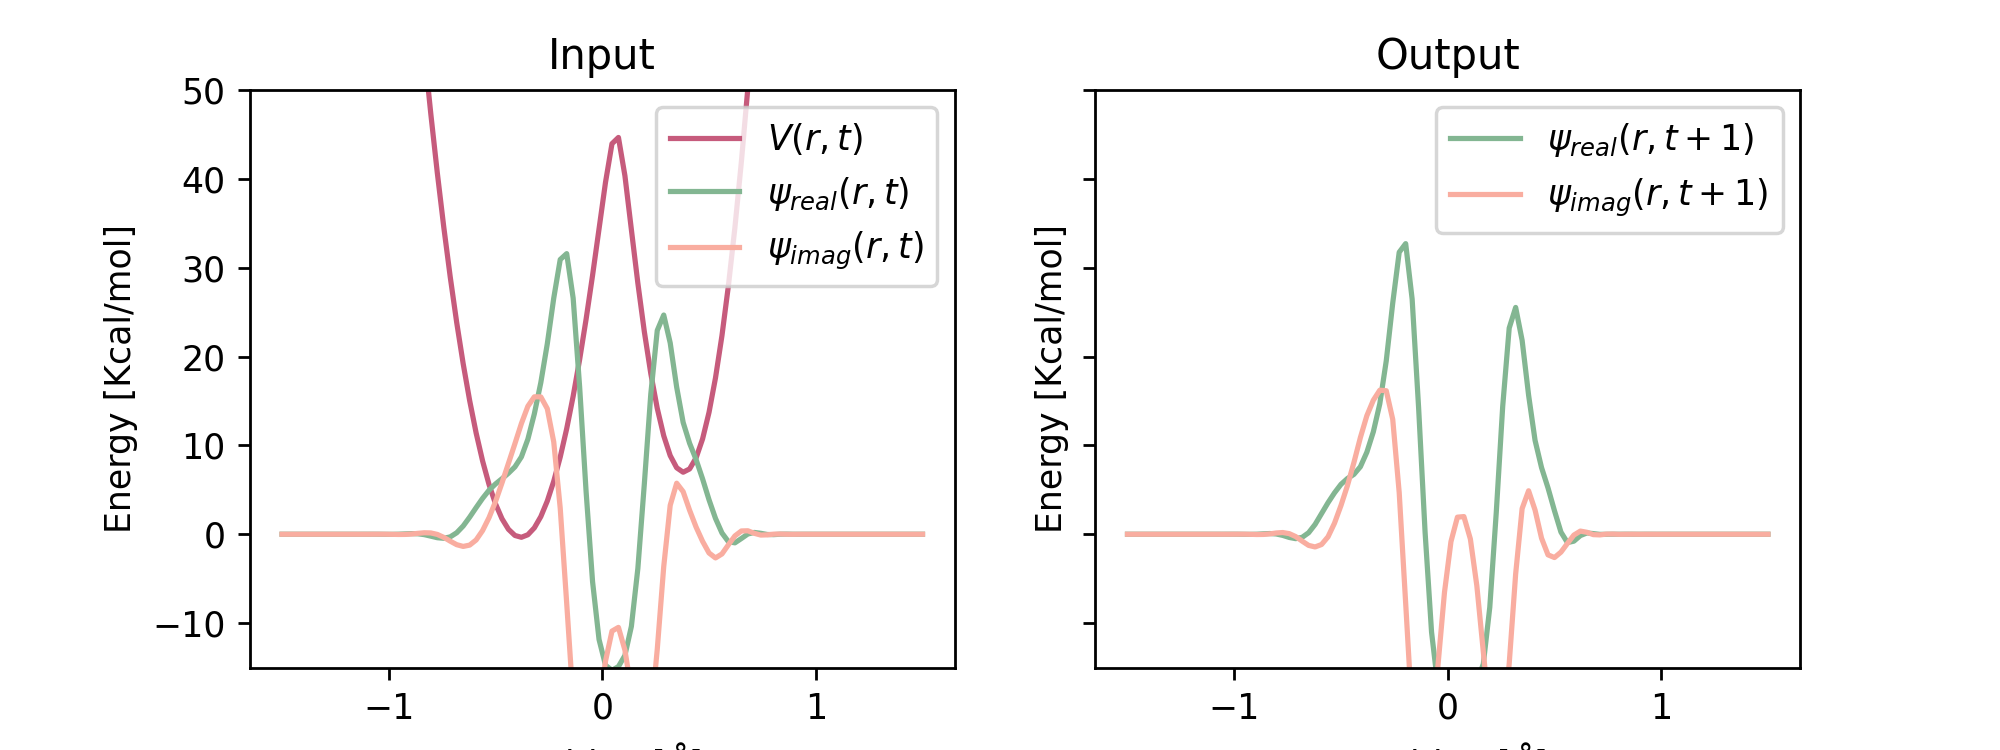

In [73]:
r_n = torch.linspace(a,b,n_grid)
time = int(10)  # Choosing from 0 to seq_len -1

In_real_vis = X_vis[dat,time,0:n_grid]
In_imag_vis = X_vis[dat,time,n_grid:n_grid*2]
In_pote = X_vis[dat,time,n_grid*2:n_grid*3]

Ou_real_vis = y_vis[dat,time,0:n_grid]
Ou_imag_vis = y_vis[dat,time,n_grid:n_grid*2]


fig, axs = plt.subplots(1,2)


# Lenght: au -> Angstroms & au -> kcal/mol
axs[0].plot(r_n, In_pote*(1/1.5936e-3), "-", label="$V(r,t)$", color=color[3])
axs[0].plot(r_n, In_real_vis*30, label="$\psi_{real}(r, t)$", color = color[0])  # Escaled
axs[0].plot(r_n, In_imag_vis*30, label="$\psi_{imag}(r, t)$", color=color[1])  # Escaled
axs[0].set_title("Input")

axs[1].plot(r_n, (In_real_vis + Ou_real_vis)*30, label="$\psi_{real}(r, t+1)$", color = color[0])  # Escaled
axs[1].plot(r_n, (In_imag_vis +Ou_imag_vis)*30, label="$\psi_{imag}(r, t+1)$", color = color[1])  # Escaled
axs[1].set_title("Output")


for ax in axs.flat:
    ax.label_outer()
    ax.set_ylim([-15, 50])
    ax.legend()
    ax.set(xlabel='Position [$\AA$]', ylabel='Energy [Kcal/mol]')

plt.gcf().set_size_inches(8, 3)
ax.legend()
plt.show()

## Checking normalization of wave packet at random time t

### [a.u.]

<IPython.core.display.Javascript object>


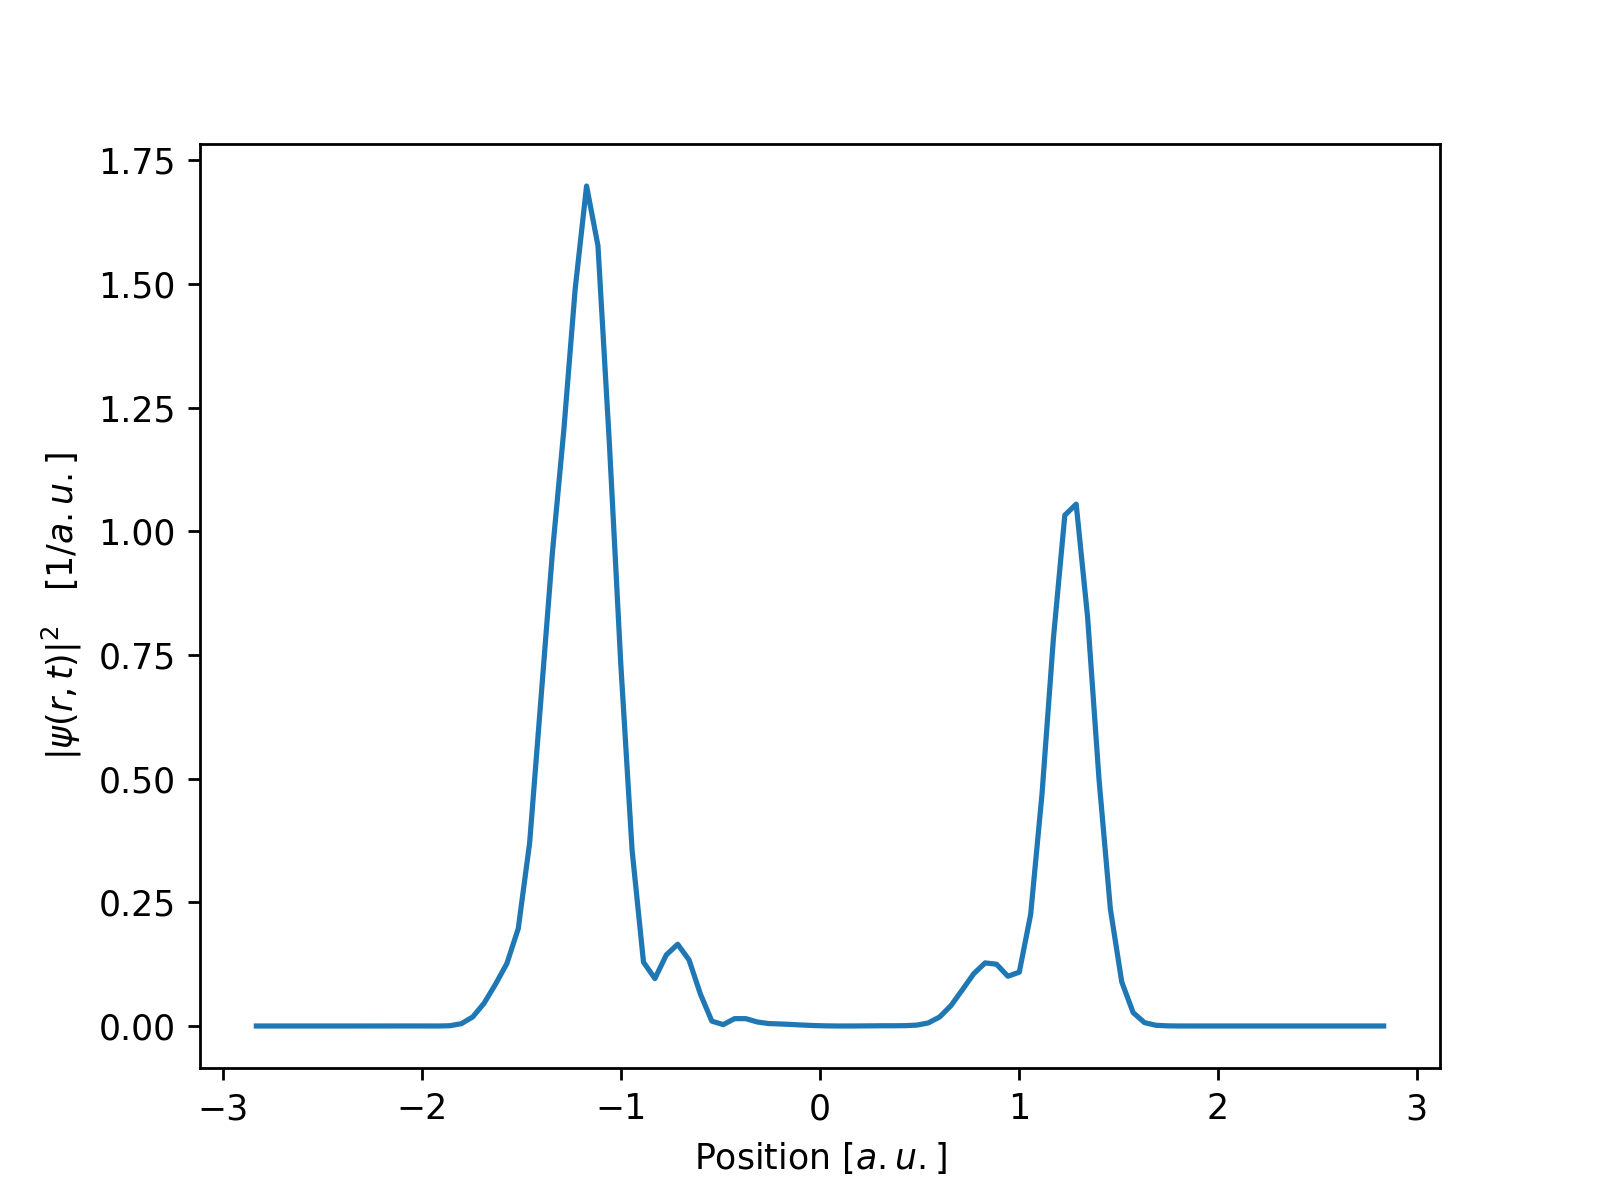

In [74]:
r_n = np.linspace(-1.5,1.5,n_grid)*(1/0.5291775)  # angstroms to au
time = int(60)

X_r = X_vis[dat,time,0:n_grid]
X_i = X_vis[dat,time,n_grid:2*n_grid]
X_de = np.vectorize(complex)(X_r,X_i)
X_dens = ((np.abs(X_de))**2)


fig, ax = plt.subplots()
ax.plot(r_n, X_dens)
ax.set(xlabel='Position $[a.u.]$', ylabel='$|\psi(r,t)|^2$   $[1/a.u.]$')
plt.show()

In [75]:
integrate.simpson(X_dens,r_n)

1.0000000000018165

### [$Å$]

<IPython.core.display.Javascript object>


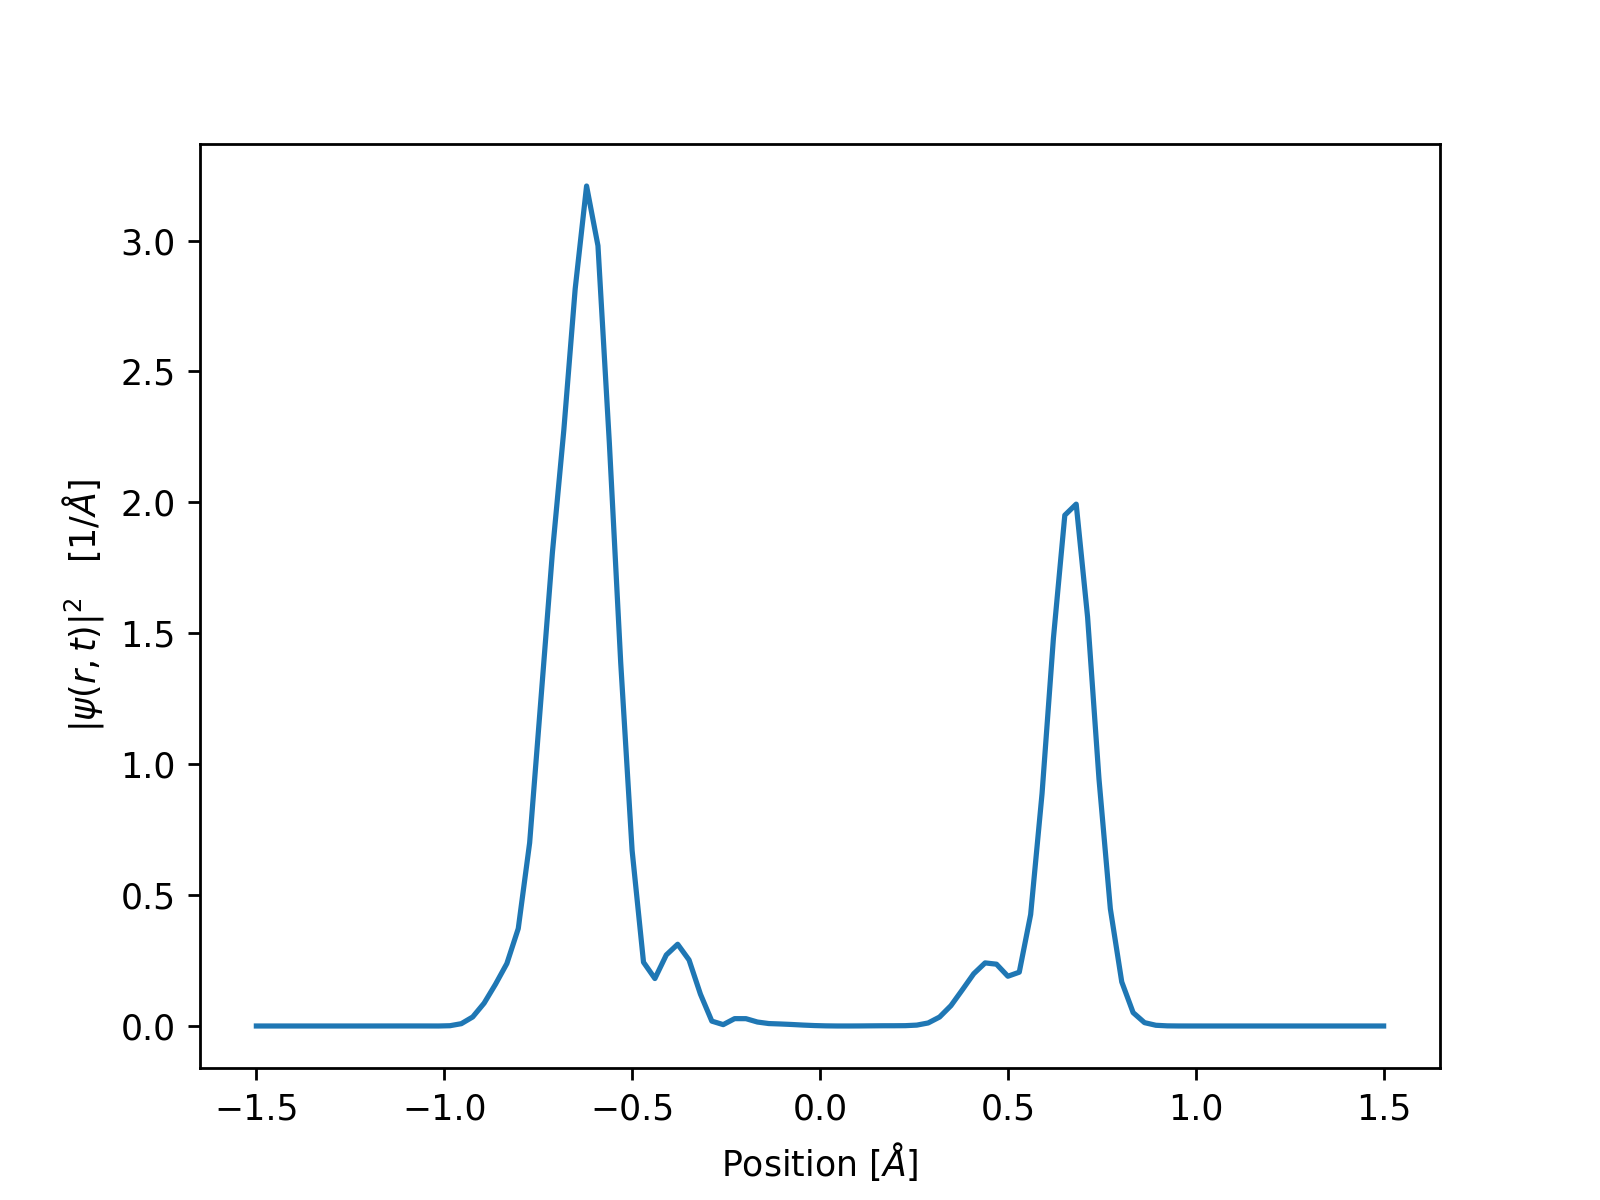

In [76]:
r_n = np.linspace(-1.5,1.5,n_grid)
time = int(60)

X_r = X_vis[dat,time,0:n_grid]*np.sqrt(1/0.5291775)
X_i = X_vis[dat,time,n_grid:2*n_grid]*np.sqrt(1/0.5291775)
X_de = np.vectorize(complex)(X_r,X_i)
X_dens = ((np.abs(X_de))**2)# or *(1/0.5291775)


fig, ax = plt.subplots()
ax.plot(r_n, X_dens)
ax.set(xlabel='Position [$\AA$]', ylabel='$|\psi(r,t)|^2$   $[1/\AA]$')
plt.show()

In [70]:
integrate.simpson(X_dens,r_n)

1.0000953098939678